## Regularization: A Simple Guide

- Topic: Regularization
- Unit: ADS1002
- Level: Beginner
- Author: Ashish Dutt
- Version: 0.0.1

### What is Regularization in Machine Learning?

<u>Regularization is a technique used in machine learning to prevent overfitting</u>. Overfitting occurs when a model learns the details and noise in the training data to the extent that it performs very well on the training data but poorly on new, unseen data. This happens because the model becomes too complex, trying to capture every small variation in the data.

<u>Regularization adds a penalty (also called a regularization term) to the model's complexity.</u> This penalty discourages the model from becoming too complex, helping it generalize better to new data.

#### Real-Life Example: Renting an Apartment

Imagine you're looking for an apartment to rent, and you want to create a model to predict rent prices based on various features like the number of bedrooms, distance to the city center, and whether it has a balcony.

- **Without Regularization**: You might create a very complex model that takes into account every tiny detail, like the color of the walls or the number of trees outside. This model might predict the rent for your current data very well, but when you apply it to another city or even another neighborhood, it might fail because it’s overfitted to your specific dataset.
- **With Regularization**: Instead, you simplify the model by focusing on the most important features (like the number of bedrooms and distance to the city center) and ignore the less important ones. The simplified model might not fit the current data perfectly, but it’s more likely to make good predictions on new data.

### Python Example

Let's look at a Python example using linear regression, which is a common machine learning model. We'll use Lasso Regression, which is a type of linear regression that includes regularization.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

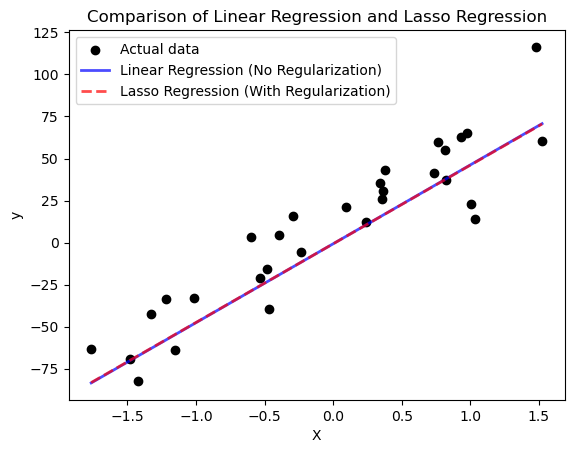

In [2]:
# Create a synthetic dataset with noise
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple linear regression model (without regularization)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Lasso regression model (with regularization)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Sorting X_test and corresponding predictions to ensure correct plotting
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test[sorted_indices]
y_pred_linear_sorted = y_pred_linear[sorted_indices]
y_pred_lasso_sorted = y_pred_lasso[sorted_indices]

# Plotting the results
plt.scatter(X_test, y_test, color='black', label='Actual data')

# Plot the linear regression line (without regularization)
plt.plot(X_test_sorted, y_pred_linear_sorted, color='blue', linestyle='-', linewidth=2, label='Linear Regression (No Regularization)', alpha=0.7)

# Plot the Lasso regression line (with regularization)
plt.plot(X_test_sorted, y_pred_lasso_sorted, color='red', linestyle='--', linewidth=2, label='Lasso Regression (With Regularization)', alpha=0.7)

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Linear Regression and Lasso Regression')
plt.show()


### Common Regularization Techniques used in Machine Learning

1. **L1 Regularization (Lasso)**

   - **Description:** Lasso (Least Absolute Shrinkage and Selection Operator) regularization penalizes the sum of the absolute values of the coefficients. This can lead to some coefficients being shrunk to zero, effectively performing feature selection.
   - **Used In:** Lasso Regression, Logistic Regression, Support Vector Machines (SVMs).

2. **L2 Regularization (Ridge)**

   - **Description:** Ridge regularization penalizes the sum of the squared values of the coefficients. Unlike Lasso, Ridge does not shrink coefficients to zero, meaning all features are retained in the model.
   - **Used In:** Ridge Regression, Logistic Regression, SVMs.

### Lasso Regularization

#### What is Lasso?

**Lasso** stands for **Least Absolute Shrinkage and Selection Operator**. It's <u>a type of linear regression that includes a regularization technique to prevent overfitting by penalizing the absolute size of the coefficients</u>. In simple terms, Lasso makes some of the coefficients exactly zero, effectively performing feature selection by excluding certain features from the model.

**Why is it called Lasso?**

The name "Lasso" comes from two key ideas:

- **Least Absolute Shrinkage**: Lasso penalizes the sum of the absolute values of the coefficients. This "shrinks" the coefficients towards zero.
- **Selection Operator**: Since Lasso can shrink some coefficients to exactly zero, it effectively "selects" a subset of features, leaving out those with zero coefficients.

**How Lasso Works**

In Lasso regression, the objective is to minimize the sum of squared residuals (which is what regular linear regression does) plus a penalty proportional to the sum of the absolute values of the coefficients. The penalty term is controlled by a parameter α (or lambda, depending on notation).

### Coefficients in Lasso and Ridge Regularization

When you use Lasso or Ridge regression, you're still calculating coefficients (β<sub>0</sub>,β<sub>1</sub>,β<sub>2</sub>,…) for your features, but with a twist:

- **Lasso (L1 Regularization)**: Adds a penalty equal to the absolute value of the coefficients (∣β<sub>1</sub>∣, ∣β<sub>2</sub>∣∣β<sub>2</sub>​∣, etc.). This can shrink some coefficients to zero.
- **Ridge (L2 Regularization)**: Adds a penalty equal to the square of the coefficients (∣β<sup>2</sup><sub>1</sub>∣, ∣β<sup>2</sup><sub>2</sub>∣, etc.) This shrinks coefficients but does not make them zero.

### Understanding Coefficients with Simple Math

Imagine you have a simple linear equation that predicts a target variable (`y`) based on one feature (`x`). The equation might look like this: y= β<sub>0</sub> + β<sub>1</sub> × x

- β<sub>0</sub>: This is the intercept, or the starting point when `x = 0`.
- β<sub>1</sub>: This is the coefficient for `x`, telling us how much `y` changes when `x` changes by 1 unit.

For example, if β1=2, then for every 1 unit increase i`n` x`,` y increases by 2 units.

### How to determine which regularisation method to use: Lasso or Ridge?

When deciding whether to use Lasso or Ridge regularization, it’s important to consider the specific conditions of your data and the goals of your model. Here's a detailed breakdown of when to use each:

1. **Lasso Regularization**

**Use Lasso when:**

- **Feature Selection is Important:**
  - **Scenario:** You suspect that many of the features in your dataset are irrelevant or redundant.
  - **Why:** Lasso can shrink the coefficients of less important features to exactly zero, effectively performing feature selection. This simplifies the model by including only the most relevant features.
- **Interpretability is Crucial:**
  - **Scenario:** You need a model that is easily interpretable, where you can clearly identify which features are being used to make predictions.
  - **Why:** By eliminating irrelevant features, Lasso produces simpler models that are easier to interpret.
- **Strong Feature Correlation (with Caveat):**
  - **Scenario:** You have features that are strongly correlated with each other.
  - **Why:** Lasso tends to select only one feature from a group of highly correlated features, assigning the other correlated features a coefficient of zero. This can be useful if you want to choose one representative feature from a set of correlated ones. However, this can also be a limitation if you want to keep all correlated features.


**Avoid Lasso when:**

- **All Features are Potentially Important:**
  - **Scenario:** You believe that all features in your dataset contribute to the outcome, and you don’t want any feature to be excluded from the model.
  - **Why:** Lasso might shrink some coefficients to zero, which can lead to the exclusion of features that do have some importance.

- **Severe Multicollinearity:**
  - **Scenario:** Your dataset has severe multicollinearity (high correlation among features).
  - **Why:** Lasso might arbitrarily choose one feature over another in the presence of multicollinearity, which can lead to instability in feature selection. Ridge or Elastic Net might be better choices in such cases.

2. **Ridge Regularization**

**Use Ridge when:**

- **All Features are Expected to Contribute:**
  - **Scenario:** You believe that all features in the dataset have some degree of importance and should be retained in the model.
  - **Why:** Ridge regularization shrinks the coefficients but does not set them to zero, meaning all features will be retained in the model, although their impact will be moderated.
- **Multicollinearity Among Features:**
  - **Scenario:** Your dataset has features that are highly correlated with each other.
  - **Why:** Ridge is effective at handling multicollinearity because it distributes the weights more evenly among correlated features, rather than selecting just one.
- **High Dimensionality Without Sparsity:**
  - **Scenario:** You have a high-dimensional dataset, but you do not expect the solution to be sparse (i.e., you expect most features to have some non-zero coefficient).
  - **Why:** Ridge will shrink all coefficients but keep them non-zero, which is ideal when you expect all features to contribute to the model.
- **Improving Model Stability:**
  - **Scenario:** Your model is overfitting, but you don’t want to completely eliminate any features.
  - **Why:** Ridge can help reduce overfitting by shrinking coefficients without setting any of them to zero, leading to a more stable model.


**Avoid Ridge when:**

- **You Need Feature Selection:**
  - **Scenario:** You want to identify and exclude irrelevant features from your model.
  - **Why:** Ridge does not perform feature selection; it only shrinks coefficients. If feature selection is important, Lasso would be a better choice.

- **Sparse Solutions are Desired:**
  - **Scenario:** You are dealing with high-dimensional data and suspect that only a few features are relevant.
  - **Why:** Ridge will keep all coefficients non-zero, even if some features are irrelevant, which might not be ideal for sparse solutions.

### Importance of `alpha` Parameter in Lasso or Ridge Regularization

The **alpha** parameter in Lasso and Ridge regression is crucial because it controls the strength of the regularization applied to the model. Regularization is a technique used to prevent overfitting by adding a penalty to the model's loss function, which discourages the model from fitting too closely to the training data.

- **Controls the Regularization Strength:**
   - The **alpha** parameter determines how much regularization is applied to the model. A larger **alpha** means more regularization, while a smaller **alpha** means less regularization.
   - **Lasso Regression:** In Lasso (L1 regularization), the penalty is the absolute value of the coefficients. A higher **alpha** can shrink some coefficients to exactly zero, effectively performing feature selection.
   - **Ridge Regression:** In Ridge (L2 regularization), the penalty is the square of the coefficients. A higher **alpha** shrinks the coefficients closer to zero but does not set them exactly to zero, retaining all features but reducing their impact.

### Summary

- Use **Lasso** when you need feature selection, have high-dimensional data with a sparse solution, or want a simpler, more interpretable model.
- Use **Ridge** when you believe all features are important, need to handle multicollinearity, or want to improve model stability without eliminating any features.

### Finding the optimal alpha value using Python

Here's a simple Python code example using the built-in `Diabetes` dataset from sklearn to demonstrate how to find the optimal **alpha** value using cross-validation for both Lasso and Ridge regularization. We'll then compare the model performance with and without the optimal alpha.

Optimal alpha for Lasso: 0.0054
Optimal alpha for Ridge: 0.0017
Lasso default MSE: 3444.67
Lasso optimal MSE: 2816.44
Ridge default MSE: 3112.97
Ridge optimal MSE: 2820.22


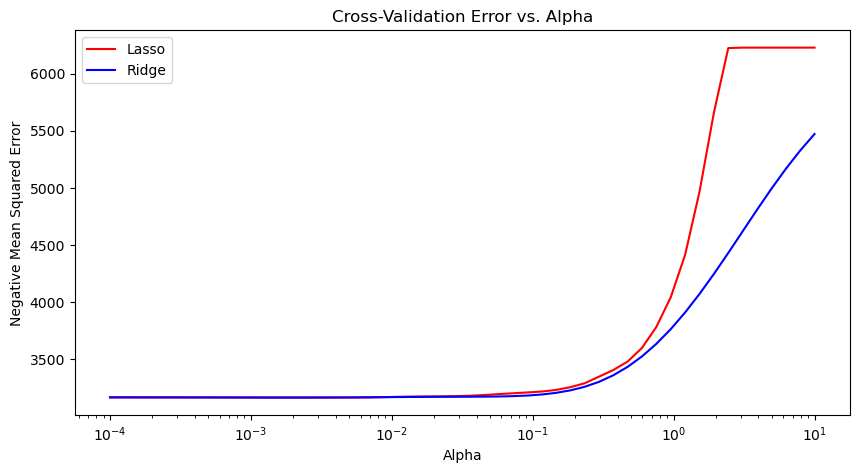

In [3]:
# Step 2: Load and Split the Dataset
# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Find Optimal alpha Using Cross-Validation
# Define a range of alpha values to test
alphas = np.logspace(-4, 1, 50)

# Use cross-validation to find the optimal alpha for Lasso
lasso_cv_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(np.mean(scores))

# Find the alpha with the highest cross-validation score (lowest error)
optimal_alpha_lasso = alphas[np.argmax(lasso_cv_scores)]

print(f"Optimal alpha for Lasso: {optimal_alpha_lasso:.4f}")

# Use cross-validation to find the optimal alpha for Ridge
ridge_cv_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(np.mean(scores))

# Find the alpha with the highest cross-validation score (lowest error)
optimal_alpha_ridge = alphas[np.argmax(ridge_cv_scores)]

print(f"Optimal alpha for Ridge: {optimal_alpha_ridge:.4f}")

# Step 4: Train and Evaluate Lasso and Ridge Models with and without Optimal alpha
lasso_default = Lasso(alpha=1.0)  # Default alpha
lasso_default.fit(X_train, y_train)
lasso_optimal = Lasso(alpha=optimal_alpha_lasso)
lasso_optimal.fit(X_train, y_train)

# Train Ridge models with and without optimal alpha
ridge_default = Ridge(alpha=1.0)  # Default alpha
ridge_default.fit(X_train, y_train)
ridge_optimal = Ridge(alpha=optimal_alpha_ridge)
ridge_optimal.fit(X_train, y_train)

# Predict and evaluate models
y_pred_lasso_default = lasso_default.predict(X_test)
y_pred_lasso_optimal = lasso_optimal.predict(X_test)
y_pred_ridge_default = ridge_default.predict(X_test)
y_pred_ridge_optimal = ridge_optimal.predict(X_test)

# Print the Mean Squared Error for each model
print("Lasso default MSE:", round(mean_squared_error(y_test, y_pred_lasso_default),2))
print("Lasso optimal MSE:", round(mean_squared_error(y_test, y_pred_lasso_optimal),2))
print("Ridge default MSE:", round(mean_squared_error(y_test, y_pred_ridge_default),2))
print("Ridge optimal MSE:", round(mean_squared_error(y_test, y_pred_ridge_optimal),2))

# Step 5: Plot Cross-Validation Scores
plt.figure(figsize=(10, 5))
plt.plot(alphas, np.abs(lasso_cv_scores), label='Lasso', color='red')
plt.plot(alphas, np.abs(ridge_cv_scores), label='Ridge', color='blue')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-Validation Error vs. Alpha')
plt.legend()
plt.show()

### Code Explanation

**Step 2: Load and Split the Dataset**

In [4]:
data = load_diabetes()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- `load_diabetes()`: Loads the Diabetes dataset, which consists of 10 baseline variables (features) and one target variable (a quantitative measure of disease progression).
- `X`: The features (input variables) of the dataset.
- `y`: The target variable (output/response variable).
- `train_test_split(X, y, test_size=0.3, random_state=42)`: Splits the dataset into training and testing sets. Here, 30% of the data is reserved for testing, and the remaining 70% is used for training. The `random_state=42` ensures the split is reproducible.

**Step 3: Find Optimal Alpha Using Cross-Validation**

In [5]:
alphas = np.logspace(-4, 1, 50)

- **alphas**: A range of alpha values to be tested for the Lasso and Ridge models. The `np.logspace(-4, 1, 50)` function generates 50 values between 10<sup>−4</sup> and 10<sup>−1</sup> (0.0001 to 10) on a logarithmic scale.

**Lasso Model Cross-Validation**

In [6]:
lasso_cv_scores = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(np.mean(scores))

optimal_alpha_lasso = alphas[np.argmax(lasso_cv_scores)]
print(f"Optimal alpha for Lasso: {optimal_alpha_lasso:.4f}")

Optimal alpha for Lasso: 0.0054


- `lasso_cv_scores`: Stores the average cross-validation scores (negative mean squared error) for each alpha value.
- `cross_val_score(...)`: Performs 5-fold cross-validation on the training data. The model is evaluated by splitting the data into 5 parts, training on 4 parts, and validating on the remaining part. This is done 5 times (each time with a different part as the validation set), and the mean of these scores is computed.
- `np.argmax(lasso_cv_scores)`: Finds the index of the highest (least negative) cross-validation score, indicating the optimal alpha for the Lasso model.

**Ridge Model Cross-Validation**

In [7]:
ridge_cv_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(np.mean(scores))

optimal_alpha_ridge = alphas[np.argmax(ridge_cv_scores)]
print(f"Optimal alpha for Ridge: {optimal_alpha_ridge:.4f}")

Optimal alpha for Ridge: 0.0017


- The process is similar to the Lasso model but using the Ridge model. The optimal alpha value for Ridge is found in the same way.

**Step 4: Train and Evaluate Lasso and Ridge Models with and without Optimal alpha**

In [8]:
lasso_default = Lasso(alpha=1.0)  # Default alpha
lasso_default.fit(X_train, y_train)
lasso_optimal = Lasso(alpha=optimal_alpha_lasso)
lasso_optimal.fit(X_train, y_train)

ridge_default = Ridge(alpha=1.0)  # Default alpha
ridge_default.fit(X_train, y_train)
ridge_optimal = Ridge(alpha=optimal_alpha_ridge)
ridge_optimal.fit(X_train, y_train)

Ridge(alpha=0.0016768329368110084)

- `Lasso(alpha=1.0)` and `Ridge(alpha=1.0)`: Train Lasso and Ridge models using the default alpha value of 1.0.
- `Lasso(alpha=optimal_alpha_lasso)` and `Ridge(alpha=optimal_alpha_ridge)`: Train models using the optimal alpha values found through cross-validation.

**Model Predictions and Evaluation**

In [9]:
y_pred_lasso_default = lasso_default.predict(X_test)
y_pred_lasso_optimal = lasso_optimal.predict(X_test)
y_pred_ridge_default = ridge_default.predict(X_test)
y_pred_ridge_optimal = ridge_optimal.predict(X_test)

print("Lasso default MSE:", round(mean_squared_error(y_test, y_pred_lasso_default),2))
print("Lasso optimal MSE:", round(mean_squared_error(y_test, y_pred_lasso_optimal),2))
print("Ridge default MSE:", round(mean_squared_error(y_test, y_pred_ridge_default),2))
print("Ridge optimal MSE:", round(mean_squared_error(y_test, y_pred_ridge_optimal),2))

Lasso default MSE: 3444.67
Lasso optimal MSE: 2816.44
Ridge default MSE: 3112.97
Ridge optimal MSE: 2820.22


- `predict(X_test)`: Generates predictions for the test data using the trained models.
- `
mean_squared_error(y_test, y_pred`): Calculates the mean squared error between the actual and predicted target values. The MSE is a measure of the average squared difference between the actual and predicted values; lower values indicate better model performance.

**Step 5: Plot Cross-Validation Scores**

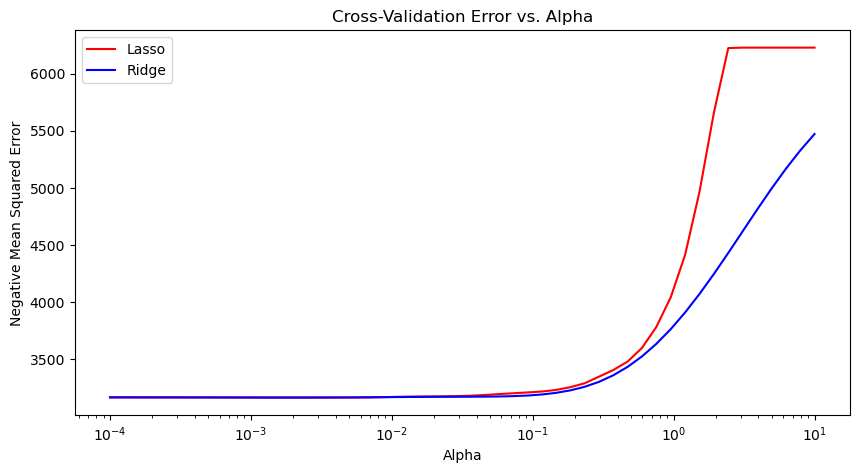

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(alphas, np.abs(lasso_cv_scores), label='Lasso', color='red')
plt.plot(alphas, np.abs(ridge_cv_scores), label='Ridge', color='blue')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-Validation Error vs. Alpha')
plt.legend()
plt.show()

- `plt.plot(...)`: Plots the absolute cross-validation errors for both Lasso and Ridge models against the alpha values on a logarithmic scale.
- `plt.xscale('log')`: Sets the x-axis to a logarithmic scale, which is appropriate given the range of alpha values.
- `plt.xlabel`, `plt.ylabel`, `plt.title`, `plt.legend`: Add labels and a legend to the plot for clarity.
- `plt.show()`: Displays the plot.

#### Summary

This code demonstrates the process of using cross-validation to find optimal regularization parameters (alpha) for Lasso and Ridge regression models. The models are then trained using both default and optimal alpha values, and their performances are evaluated using the mean squared error. Finally, a plot of the cross-validation scores across different alpha values is displayed to visualize the model performance.